In [12]:
import time
import shutil
import math
import re
import itertools
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

import json
from IPython.display import display, JSON

import networkx as nx
from graphviz import Digraph

from IPython.display import display, JSON
from scipy import stats

%matplotlib inline
my_client = fbl.get_client()

# R23E10

In [13]:
notebook_name = ipynbname.name() + ".ipynb"  # Add the extension
print("Notebook being pushed:", notebook_name)

Notebook being pushed: FB_IO_Analysis.ipynb


In [19]:
data = my_client.executeNLPquery('clear')

[FBL NLP 2025-05-24 17:22:15,010] NLP successfully parsed query.


## NOI to remove

In [20]:
data = my_client.executeNLPquery("add $hDelta$")

[FBL NLP 2025-05-24 17:22:16,381] NLP successfully parsed query.


In [26]:
#Neurmorphology and Simulation
import neuroarch.na as na
flywire = na.NeuroArch("flywire",port=2424) #create connection to flywire

In [30]:
neuropil = flywire.sql_query(""" select from Neuropil where name = "{}" """ .format(any)) 

In [31]:
# Query to retrieve all class types in the OrientDB database
query = "SELECT name FROM (SELECT expand(classes) FROM metadata:schema)"
class_types = flywire.sql_query(query)

if len(class_types) == 0:
    print("No class types found in the database.")
else:
    # Store class names in a list
    class_names = [class_type.name for class_type in class_types]

    # Sort the list alphabetically
    sorted_class_names = sorted(class_names)

    # Print the sorted list
    for class_name in sorted_class_names:
        print(class_name)


Aggregator
AlphaSynapse
ArborizationData
ArborizesIn
AxonHillockModel
BioNode
BioSensor
BufferPhoton
BufferVoltage
CRModel
Cartridge
CartridgeModel
Circuit
CircuitDiagram
CircuitModel
Column
ColumnModel
DataSource
DendriteModel
DesignNode
E
ExecutableCircuit
GapJunction
GeneticData
Glomerulus
HasData
HasQueryResults
HodgkinHuxley
HodgkinHuxleyFull
InferredSynapse
Interface
LPU
LeakyIAF
LeakyIAFwithRefractoryPeriod
MembraneModel
MetaData
Models
MorphologyData
MorrisLecar
NarxAdaptive
Neuron
NeuronAndFragment
NeuronFragment
NeuronModel
NeuronTerminal
Neuropil
NeurotransmitterData
Node
OFunction
OGeometryCollection
OIdentity
OLineString
OMultiLineString
OMultiPoint
OMultiPolygon
OPoint
OPolygon
ORectangle
ORestricted
ORole
OSchedule
OSecurityPolicy
OSequence
OShape
OTriggered
OUser
Ommatidium
OmmatidiumModel
Owns
Pattern
PhotoreceptorCell
PhotoreceptorModel
Port
PowerGPotGPot
QueryOwns
QueryResult
Relationship
Requires
SendsTo
SigmoidSynapse
Species
Subregion
Subsystem
Synapse
SynapseAMPA

In [32]:


# Query to retrieve sample records from the Neuropil class
query = "SELECT * FROM Neuropil LIMIT 100"  # Adjust the limit as needed
neuropil_records = flywire.sql_query(query)

if len(neuropil_records) == 0:
    print("No records found in the 'Neuropil' class.")
else:
    print("Sample records in 'Neuropil' class:")
    for record in neuropil_records:
        # Print the ID and the properties of each record
        print(f"ID: {record._id}, Name: {record._props['name']}, Synonyms: {record._props['synonyms']}")


Sample records in 'Neuropil' class:
ID: #402:0, Name: LH_R, Synonyms: ['Right Lateral Horn']
ID: #410:0, Name: SCL_R, Synonyms: ['Right Superior Clamp']
ID: #413:1, Name: WED_L, Synonyms: ['Left Wedge']
ID: #431:0, Name: LO_L, Synonyms: ['Left Lobula']
ID: #408:1, Name: SLP_L, Synonyms: ['Left Superior Lateral Protocerebrum']
ID: #403:1, Name: PED_L, Synonyms: ['Left Pedunculus']
ID: #439:0, Name: AMMC_L, Synonyms: ['Left Antennal Mechanosensory and Motor Center']
ID: #414:1, Name: PLP_L, Synonyms: ['Left Posteriorlateral Protocerebrum']
ID: #406:1, Name: CA_L, Synonyms: ['Left Calyx']
ID: #421:0, Name: SLP_R, Synonyms: ['Right Superior Lateral Protocerebrum']
ID: #422:0, Name: SIP_R, Synonyms: ['Right Superior Intermediate Protocerebrum']
ID: #425:0, Name: PVLP_R, Synonyms: ['Right Posterior Ventrolateral Protocerebrum']
ID: #411:0, Name: VES_R, Synonyms: ['Right Vest']
ID: #410:1, Name: SMP_L, Synonyms: ['Left Superior Medial Protocerebrum']
ID: #401:1, Name: IPS_L, Synonyms: ['Left 

In [224]:
neuropil_name = 'FB'
neuropil = flywire.sql_query(""" select from Neuropil where name = "{}" """.format(neuropil_name)) 
neurons = neuropil.gen_traversal_in(['ArborizesIn', 'Neuron'], min_depth = 1) 
celltype_names = list(np.unique([neuron.name for neuron in neurons.node_objs]))
print(celltype_names)

import itertools

maxLoop = 10  # Change this to your desired number of lines
for neuron in itertools.islice(neurons.node_objs, maxLoop):
    print(neuron._props['name'])
    
    
print(neuron._props)

['AOTU041', 'AOTU042', 'AOTU046', 'AOTUv3_ventral', 'AOTUv4_ventral', 'AVLP009', 'AVLP016', 'AVLP020', 'AVLP021', 'AVLP022', 'AVLP034', 'AVLP037', 'AVLP039', 'AVLP040', 'AVLP048', 'AVLP076', 'AVLP077', 'AVLP169', 'AVLP178', 'AVLP182', 'AVLP190b', 'AVLP191c', 'AVLP193', 'AVLP210', 'AVLP211', 'AVLP245', 'AVLP255', 'AVLP315', 'AVLP317', 'AVLP397', 'AVLP434', 'AVLP451', 'AVLP473', 'AVLP491', 'AVLP523', 'AVLP538', 'AVLP591', 'AVLP_pr11', 'AVLP_pr22', 'AstA1', 'CB0009', 'CB0026', 'CB0059', 'CB0060', 'CB0082', 'CB0150', 'CB0168', 'CB0199', 'CB0234', 'CB0257', 'CB0262', 'CB0269', 'CB0270', 'CB0351', 'CB0361', 'CB0529', 'CB0580', 'CB0584', 'CL001', 'CL002', 'CL003', 'CL008', 'CL009', 'CL010', 'CL022', 'CL023', 'CL029a', 'CL029b', 'CL030', 'CL037', 'CL055', 'CL056', 'CL062', 'CL063', 'CL069', 'CL070', 'CL071', 'CL093', 'CL094', 'CL095', 'CL110', 'CL111', 'CL121', 'CL123', 'CL176', 'CL177', 'CL179', 'CL196', 'CL199', 'CL201', 'CL208', 'CL209', 'CL212', 'CL214', 'CL215', 'CL236', 'CL237', 'CL248',

In [225]:
# Inspect the attributes and methods of the first neuron object
first_neuron = neurons.node_objs[0]
neuronData = first_neuron.out('HasData')
print(dir(first_neuron))

# Optionally, print the properties to see their values
print(first_neuron.__dict__)
print(first_neuron._id)
print(first_neuron.name)

print('---------')
outgoing_synapses = first_neuron.out('SendsTo')
for synapse in outgoing_synapses: # Check the properties of the synapse 
    synapse_props = synapse.get_props()
print(synapse_props)
print('neuroTransmitterList')


# Check if neuronData is not empty and contains valid objects
if neuronData:
    # Access the first ArborizationData object
    arborization_data = neuronData[0]

    # Access the 'Transmitters' property of the ArborizationData object
    neuronTransmitterList = arborization_data.props.get('Transmitters', None)
    
    print(neuronTransmitterList)
else:
    print("No data available for the neuron.")


['Abstract', 'Broker', 'PropertyLookup', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_graph', '_id', '_props', 'both', 'bothE', 'context', 'decl_root', 'decl_type', 'element_plural', 'element_type', 'from_graph', 'get_props', 'gremlin', 'gremlin_raw', 'inE', 'in_', 'info', 'label', 'load', 'locality', 'name', 'objects', 'out', 'outE', 'owned_by', 'owns', 'props', 'query', 'referenceId', 'registry', 'registry_name', 'registry_plural', 'save', 'synonyms', 'traverse', 'traverse_owned_by', 'traverse_owns', 'uname', 'update']
{'_graph': <pyorient.ogm.graph.Graph object at 0x7f9d8d6b8460>, '_id': '#896:2039', '_props': {'uname': 'LALv1_R_49', 'name': 'LALv1', 'referenceId': '720575940

In [161]:
import numpy as np

# Step 1: Retrieve Neurons Innervating FB Neuropil
neuropil_name = 'FB'
neuropil = flywire.sql_query("""SELECT FROM Neuropil WHERE name = '{}'""".format(neuropil_name))
neurons = neuropil.gen_traversal_in(['ArborizesIn', 'Neuron'], min_depth=1)

# Step 2: Count Synapses within FB Neuropil
synapse_counts = {}

# Assuming 'neuron' is your neuron object
synapse_classes = ['Synapse', 'InferredSynapse']

for neuron in neurons.node_objs:
    neuron_name = neuron._props['name']

    # Perform the traversal using the 'SendsTo' relationship
    outgoing_synapses = neuron.out('SendsTo')

    # Inspect the properties of the outgoing synapses
    for synapse in outgoing_synapses:
        pass

in_neuropils = synapse.out('LocatedIn') # Adjust based on your exact relationship for neuropil in in_neuropils: if neuropil._props['name'] ==



In [236]:

## In this step we gather all the Neurotransmitter data from flywire
#This can be only done for each type 
# Initialize a counter for the number of batches processed
neuron_count = 0
neuroTransmitterDict = {} #we store unique list of neur type and neurotrans

#Store Tau values related to their neurotransmitter
#Needs to be updated with further research
tauDict = {"acetylcholine" : 2.0,
           "glutamate"     : 10,
           "GABA"          : 5,
           "dopamine"      : 2,
           "octopamine"    : 5,
           "serotonin"     : 5
          }


# Function to clean neuron names 
def clean_name(name): 
    # Remove non-printable characters and strip leading/trailing whitespace 
    return re.sub(r'[^\x20-\x7E]', '', name).strip()

def process_batch(neuron_names):
    
    global neuron_count # Declare neuron_count as global to modify it inside this function

    # Clean and ensure the SQL query is properly formatted and remove any duplicates
    unique_names = list(set(clean_name(name) for name in neuron_names))  # Remove duplicate names and clean them
    query_conditions = " OR ".join(f"name = '{name}'" for name in unique_names)  # Format the conditions correctly
    query = f"SELECT FROM Neuron WHERE {query_conditions}"  # Construct the query
    
    # Debug: Print the query to inspect it
    #print(f"Executing query: {query}")
    
    try:
        query_result = flywire.sql_query(query)         
        nt_query_result = query_result.gen_traversal_out(['HasData', 'NeurotransmitterData'], min_depth = 1)
        number_nodes = len(nt_query_result.node_objs)
        
        if len(nt_query_result.node_objs) > 0:
            neuron_count += number_nodes
            
            for neuron in nt_query_result.node_objs:
                neuron_name = neuron._props['name']
                nt = neuron._props['Transmitters']
                neuroTransmitterDict[neuron_name] = nt
               
                
    except Exception as e:
        print(f"Error retrieving or neurotransmitter data: {e}")


# Define the batch size and limit on the number of batches
batch_size = 20  # Adjust this value based on your system's capabilities
batch_limit = 100  # Adjust this value to experiment with a variable number of batches

# Collect neuron names and clean them
neuron_names = [clean_name(neuron._props['name']) for neuron in itertools.islice(neurons.node_objs, maxLoop) if neuron._props['name'] != 'unknown']

batch_count = 0

# Process neuron names in batches with a limit on the number of batches
for i in range(0, len(neuron_names), batch_size):
    if batch_count >= batch_limit:
        break
    batch = neuron_names[i:i+batch_size]
    process_batch(batch)
    batch_count += 1
    print(f"Processed batch {batch_count}/{batch_limit}")

print(f"Neuron Total Processed: {neuron_count}")
print(f"Total neurons expected: {len(neuron_names)}")

# Sort the neuroTransmitterDict by keys in alphabetical order 
sorted_neuroTransmitterDict = dict(sorted(neuroTransmitterDict.items()))

# Save the sorted dictionary to a JSON file 
output_file = "neuro_transmitter_data.json" 
with open(output_file, 'w') as file: 
    json.dump(sorted_neuroTransmitterDict, file, indent=4)



Processed batch 1/100
Processed batch 2/100
Processed batch 3/100
Processed batch 4/100
Processed batch 5/100
Processed batch 6/100
Processed batch 7/100
Processed batch 8/100
Processed batch 9/100
Processed batch 10/100
Processed batch 11/100
Processed batch 12/100
Processed batch 13/100
Processed batch 14/100
Processed batch 15/100
Processed batch 16/100
Processed batch 17/100
Processed batch 18/100
Processed batch 19/100
Processed batch 20/100
Processed batch 21/100
Processed batch 22/100
Processed batch 23/100
Processed batch 24/100
Processed batch 25/100
Processed batch 26/100
Processed batch 27/100
Processed batch 28/100
Processed batch 29/100
Processed batch 30/100
Processed batch 31/100
Processed batch 32/100
Processed batch 33/100
Processed batch 34/100
Processed batch 35/100
Processed batch 36/100
Processed batch 37/100
Processed batch 38/100
Processed batch 39/100
Processed batch 40/100
Processed batch 41/100
Processed batch 42/100
Processed batch 43/100
Processed batch 44/1

In [237]:
# Sort the dictionary by keys 
sorted_neuroTransmitterDict = dict(sorted(neuroTransmitterDict.items()))
print(sorted_neuroTransmitterDict)



{'AOTU041_L_1': ['GABA'], 'AOTU041_L_2': ['GABA'], 'AOTU041_R_1': ['GABA'], 'AOTU041_R_2': ['GABA'], 'AOTU046_L_2': ['glutamate'], 'AOTUv3_ventral_L_1': ['glutamate'], 'AOTUv3_ventral_L_10': ['glutamate'], 'AOTUv3_ventral_L_11': ['glutamate'], 'AOTUv3_ventral_L_12': ['glutamate'], 'AOTUv3_ventral_L_13': ['glutamate'], 'AOTUv3_ventral_L_14': ['glutamate'], 'AOTUv3_ventral_L_15': ['glutamate'], 'AOTUv3_ventral_L_16': ['glutamate'], 'AOTUv3_ventral_L_17': ['glutamate'], 'AOTUv3_ventral_L_18': ['glutamate'], 'AOTUv3_ventral_L_19': ['glutamate'], 'AOTUv3_ventral_L_2': ['glutamate'], 'AOTUv3_ventral_L_20': ['glutamate'], 'AOTUv3_ventral_L_3': ['glutamate'], 'AOTUv3_ventral_L_4': ['glutamate'], 'AOTUv3_ventral_L_5': ['glutamate'], 'AOTUv3_ventral_L_6': ['glutamate'], 'AOTUv3_ventral_L_7': ['glutamate'], 'AOTUv3_ventral_L_8': ['glutamate'], 'AOTUv3_ventral_L_9': ['glutamate'], 'AOTUv3_ventral_R_1': ['glutamate'], 'AOTUv3_ventral_R_10': ['glutamate'], 'AOTUv3_ventral_R_11': ['glutamate'], 'AOTU

In [ ]:
#chatGPT original
    
data = neuroTransmitterDict

# Step 1: Count neurotransmitters and total synapses using each neurotransmitter
neurotransmitter_counts = Counter()
for neuron_data in data.values():
    for neurotransmitter in neuron_data:
        neurotransmitter_counts[neurotransmitter] += 1

# Step 2: Calculate total synapses and neurotransmitter percentages
total_synapses = sum(neurotransmitter_counts.values())
neurotransmitter_percentages = {nt: (count / total_synapses) * 100 for nt, count in neurotransmitter_counts.items()}

# Step 3: Calculate neurotransmitter usage by neuron type (prefix of neuron name)
neuron_type_counts = defaultdict(Counter)
for neuron_name, neuron_data in data.items():
    neuron_type = neuron_name.split('_')[0]  # extract prefix before '_'
    for neurotransmitter in neuron_data:
        neuron_type_counts[neuron_type][neurotransmitter] += 1

# Step 4: Visualizations
# 4.1 Pie chart for neurotransmitter distribution
plt.figure(figsize=(8, 8))
plt.pie(neurotransmitter_counts.values(), labels=neurotransmitter_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Neurotransmitter Distribution")
plt.show()

# 4.2 Bar chart for neurotransmitter usage by neuron type
fig, ax = plt.subplots(figsize=(10, 6))
for neurotransmitter, color in zip(neurotransmitter_counts.keys(), ['#ff9999','#66b3ff','#99ff99','#ffcc99']):
    neuron_types = list(neuron_type_counts.keys())
    counts = [neuron_type_counts[nt][neurotransmitter] for nt in neuron_types]
    ax.bar(neuron_types, counts, label=neurotransmitter, color=color)

ax.set_xlabel("Neuron Type")
ax.set_ylabel("Number of Synapses")
ax.set_title("Neurotransmitter Usage by Neuron Type")
ax.legend(title="Neurotransmitter")
plt.xticks(rotation=45)
plt.show()

# Display results for neurotransmitter percentages and neuron type data
neurotransmitter_percentages, neuron_type_counts


# Filter data to include only neuron types that start with 'FB' or 'FC'
selected_prefixes = ['FB', 'FC']

filtered_neuron_type_counts = {nt: counts for nt, counts in neuron_type_counts.items() if any(nt.startswith(prefix) for prefix in selected_prefixes)}

# Re-calculate neurotransmitter totals specifically for 'FB' and 'FC' neuron types
filtered_neurotransmitter_counts = Counter()
for counts in filtered_neuron_type_counts.values():
    for neurotransmitter, count in counts.items():
        filtered_neurotransmitter_counts[neurotransmitter] += count

# Total synapses in selected neuron types
filtered_total_synapses = sum(filtered_neurotransmitter_counts.values())
filtered_neurotransmitter_percentages = {nt: (count / filtered_total_synapses) * 100 for nt, count in filtered_neurotransmitter_counts.items()}

# Step 4.1: Re-generate pie chart for neurotransmitter distribution (filtered to 'FB' and 'FC')
plt.figure(figsize=(8, 8))
plt.pie(filtered_neurotransmitter_counts.values(), labels=filtered_neurotransmitter_counts.keys(),
        autopct='%1.1f%%', startangle=140)
plt.title("Neurotransmitter Distribution in 'FB' and 'FC' Neuron Types")
plt.show()

# Step 4.2: Re-generate bar chart for neurotransmitter usage by neuron type (filtered to 'FB' and 'FC')
fig, ax = plt.subplots(figsize=(10, 6))
for neurotransmitter, color in zip(filtered_neurotransmitter_counts.keys(), ['#ff9999','#66b3ff','#99ff99','#ffcc99']):
    neuron_types = list(filtered_neuron_type_counts.keys())
    counts = [filtered_neuron_type_counts[nt][neurotransmitter] for nt in neuron_types]
    ax.bar(neuron_types, counts, label=neurotransmitter, color=color)

ax.set_xlabel("Neuron Type")
ax.set_ylabel("Number of Synapses")
ax.set_title("Neurotransmitter Usage by 'FB' and 'FC' Neuron Types")
ax.legend(title="Neurotransmitter")
plt.xticks(rotation=45)
plt.show()

# Display the neurotransmitter percentages for the filtered neuron types
filtered_neurotransmitter_percentages


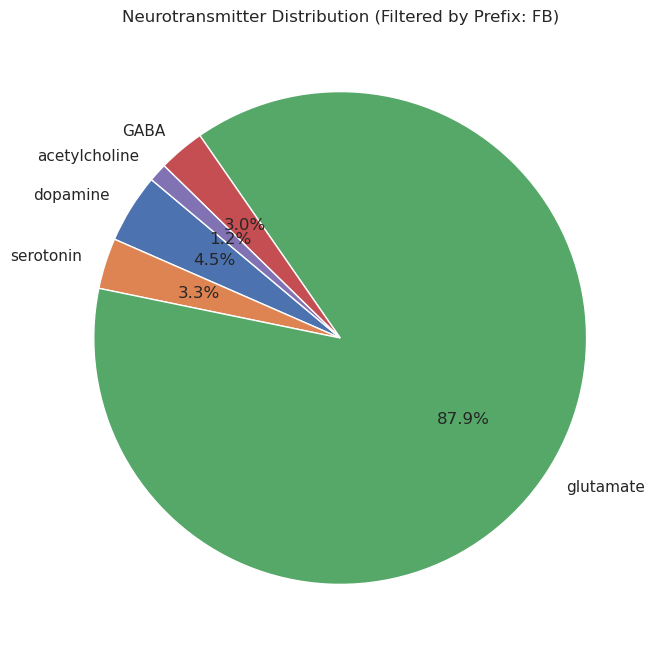

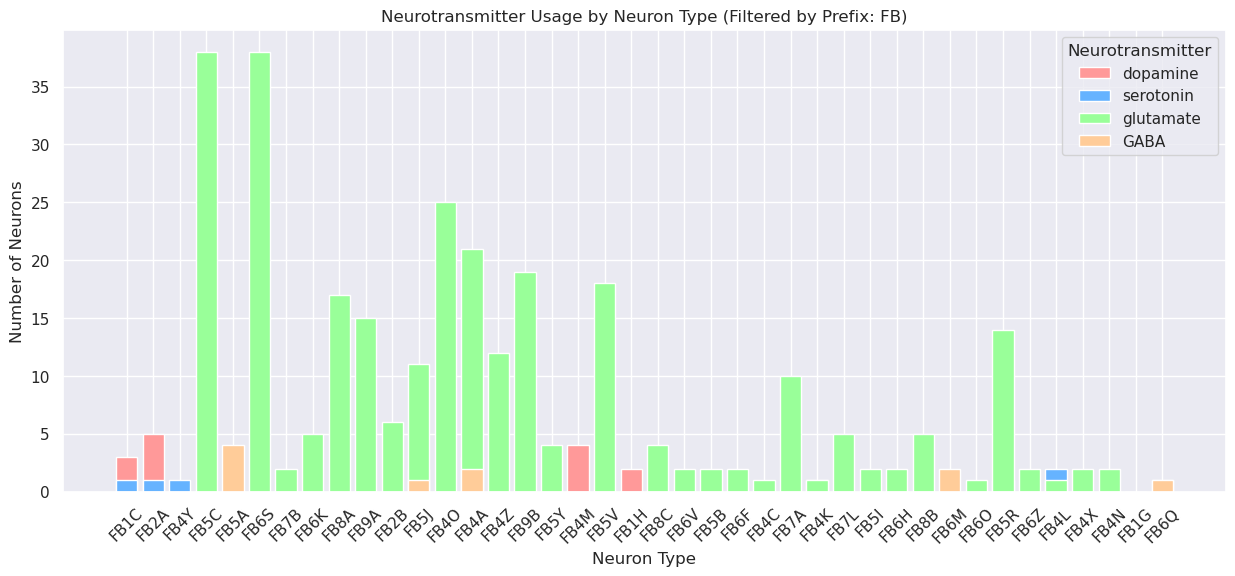

{'dopamine': 4.545454545454546,
 'serotonin': 3.3333333333333335,
 'glutamate': 87.87878787878788,
 'GABA': 3.0303030303030303,
 'acetylcholine': 1.2121212121212122}

In [238]:
#copilot

data = neuroTransmitterDict

# Define a threshold for the maximum number of synapses a neuron or neuron type should have
synapse_threshold = 100  # Adjust this threshold as needed
prefix_length = 4  # Set the desired prefix length (e.g., 3 or 4)
width_factor = 1.5  # Adjust this factor to increase/decrease the width of the graph
prefix_filter = 'FB'  # Set the prefix to filter neuron types

# Step 1: Count neurotransmitters and total synapses using each neurotransmitter
neurotransmitter_counts = Counter()
for neuron_data in data.values():
    for neurotransmitter in neuron_data:
        neurotransmitter_counts[neurotransmitter] += 1

# Step 2: Calculate total synapses and neurotransmitter percentages
total_neuron_types = sum(neurotransmitter_counts.values())
neurotransmitter_percentages = {nt: (count / total_neuron_types) * 100 for nt, count in neurotransmitter_counts.items()}

# Step 3: Calculate neurotransmitter usage by neuron type (variable prefix length)
neuron_type_counts = defaultdict(Counter)
for neuron_name, neuron_data in data.items():
    neuron_type = neuron_name[:prefix_length]  # Extract prefix of specified length
    if neuron_name.startswith(prefix_filter):  # Apply prefix filter
        for neurotransmitter in neuron_data:
            neuron_type_counts[neuron_type][neurotransmitter] += 1

# Step 4: Filter out neuron types that exceed the synapse threshold
filtered_neuron_type_counts = {nt: counts for nt, counts in neuron_type_counts.items()
                               if sum(counts.values()) <= synapse_threshold}

# Re-calculate neurotransmitter totals after filtering
filtered_neurotransmitter_counts = Counter()
for counts in filtered_neuron_type_counts.values():
    for neurotransmitter, count in counts.items():
        filtered_neurotransmitter_counts[neurotransmitter] += count

# Total synapses in filtered neuron types
filtered_total_synapses = sum(filtered_neurotransmitter_counts.values())
filtered_neurotransmitter_percentages = {nt: (count / filtered_total_synapses) * 100 for nt, count in filtered_neurotransmitter_counts.items()}

# Step 5: Visualizations

# 5.1 Pie chart for neurotransmitter distribution (filtered)
plt.figure(figsize=(8, 8))
plt.pie(filtered_neurotransmitter_counts.values(), labels=filtered_neurotransmitter_counts.keys(),
        autopct='%1.1f%%', startangle=140)
plt.title(f"Neurotransmitter Distribution (Filtered by Prefix: {prefix_filter})")
plt.show()

# 5.2 Bar chart for neurotransmitter usage by neuron type (filtered)
fig, ax = plt.subplots(figsize=(10 * width_factor, 6))  # Adjust width using width_factor
for neurotransmitter, color in zip(filtered_neurotransmitter_counts.keys(), ['#ff9999','#66b3ff','#99ff99','#ffcc99']):
    neuron_types = list(filtered_neuron_type_counts.keys())
    counts = [filtered_neuron_type_counts[nt][neurotransmitter] for nt in neuron_types]
    ax.bar(neuron_types, counts, label=neurotransmitter, color=color)

ax.set_xlabel("Neuron Type")
ax.set_ylabel("Number of Neurons")
ax.set_title(f"Neurotransmitter Usage by Neuron Type (Filtered by Prefix: {prefix_filter})")
ax.legend(title="Neurotransmitter")
plt.xticks(rotation=45)
plt.show()

# Display the filtered neurotransmitter percentages
filtered_neurotransmitter_percentages


In [134]:
outDict = {}
inDict = {}
query = f"SELECT FROM Neuron WHERE name = 'FB1G'"  # Construct the query
query_result = flywire.sql_query(query) 
#query_result = query_result.gen_traversal_out(['HasData', 'NeurotransmitterData'], min_depth = 1)
out_query_result = query_result.gen_traversal_out(['HasData','ArborizationData'], min_depth = 1)

print("outDict")
for neuron in out_query_result.node_objs:
    neuron_name = neuron._props['uname']
    outProps = neuron._props
    outDict[neuron_name] = outProps

display(JSON(outDict))   
print('-----------')

query = f"SELECT FROM Neuron WHERE name = 'FB1G'"  # Construct the query
query_result = flywire.sql_query(query) 
#query_result = query_result.gen_traversal_out(['HasData', 'NeurotransmitterData'], min_depth = 1)
in_query_result = query_result.gen_traversal_in(['HasData','ArborizationData'], min_depth = 1)

for neuron in in_query_result.node_objs:
    neuron_name = neuron._props['uname']
    inProps = neuron._props
    inDict[neuron_name] = inProps

display(JSON(inDict))
    

outDict


<IPython.core.display.JSON object>

-----------


<IPython.core.display.JSON object>

In [232]:
# timer
start_time = time.time()

numberofSynapses = 0
numberOfNeurons = 0



synapse_counts = {}

# Regex pattern to match synapses starting with '--FB'
pattern = re.compile(r'--FB(.+)$')

maxLoop = 8000  # Change this to desired number of lines
# Iterate through each neuron and its outgoing synapses
for neuron in itertools.islice(neurons.node_objs, maxLoop):
    neuron_name = neuron._props['name']
    synapse_counts[neuron_name] = {}
    
    # Get outgoing synapses using the 'SendsTo' relationship
    outgoing_synapses = neuron.out('SendsTo')
    # Keep a running total of all synapses
    numberofSynapses += len(outgoing_synapses)
    
    
    for synapse in outgoing_synapses:
        synapse_name = synapse.get_props()['name']
        
        # Use regex to check if the synapse name starts with '--FB'
        match = pattern.search(synapse_name)
        if match:
            # Ensure the synapse name is in the dictionary for the current neuron before incrementing
            if synapse_name not in synapse_counts[neuron_name]:
                synapse_counts[neuron_name][synapse_name] = 0
            synapse_counts[neuron_name][synapse_name] += synapse.get_props()['N']


numberOfNeurons = len(neurons)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.2f} seconds")
print('--------------------')
print(f"{numberOfNeurons} neurons processed")
print(f"{numberofSynapses} Synapses processed")
                
# Print the synapse counts for each neuron type
for neuron_type, synapses in synapse_counts.items():
    print(f"Neuron Type: {neuron_type}")
    for synapse_name, count in synapses.items():
        print(f"  Synapse: {synapse_name}, Count: {count}")




Elapsed time: 290.90 seconds
--------------------
3131 neurons processed
104517 Synapses processed
Neuron Type: LALv1
  Synapse: LALv1--FB1G, Count: 17
Neuron Type: FB2A
  Synapse: FB2A--FB2A, Count: 33
  Synapse: FB2A--FB2B, Count: 16
Neuron Type: FC2B
  Synapse: FC2B--FB5A, Count: 58
  Synapse: FC2B--FB5C, Count: 5
Neuron Type: FB5H
  Synapse: FB5H--FB5R, Count: 22
  Synapse: FB5H--FB4Y, Count: 29
  Synapse: FB5H--FB5C, Count: 10
  Synapse: FB5H--FB5J, Count: 49
  Synapse: FB5H--FB5A, Count: 41
  Synapse: FB5H--FB5H, Count: 13
Neuron Type: Tubu02
Neuron Type: pC1d_TopOutputs  | AVLP_pr36
Neuron Type: vDeltaA
  Synapse: vDeltaA--FB4A, Count: 12
Neuron Type: FS2
  Synapse: FS2--FB6H, Count: 5
Neuron Type: SA1
Neuron Type: FB4Y
  Synapse: FB4Y--FB5J, Count: 5
Neuron Type: ER2
Neuron Type: PFNm
  Synapse: PFNm--FB1C, Count: 5
Neuron Type: FB5C
  Synapse: FB5C--FB5R, Count: 5
  Synapse: FB5C--FB5C, Count: 7
Neuron Type: SMP529
Neuron Type: DM6_medial
  Synapse: DM6_medial--FB6H, Count: 6


In [ ]:
print(synapse_counts)

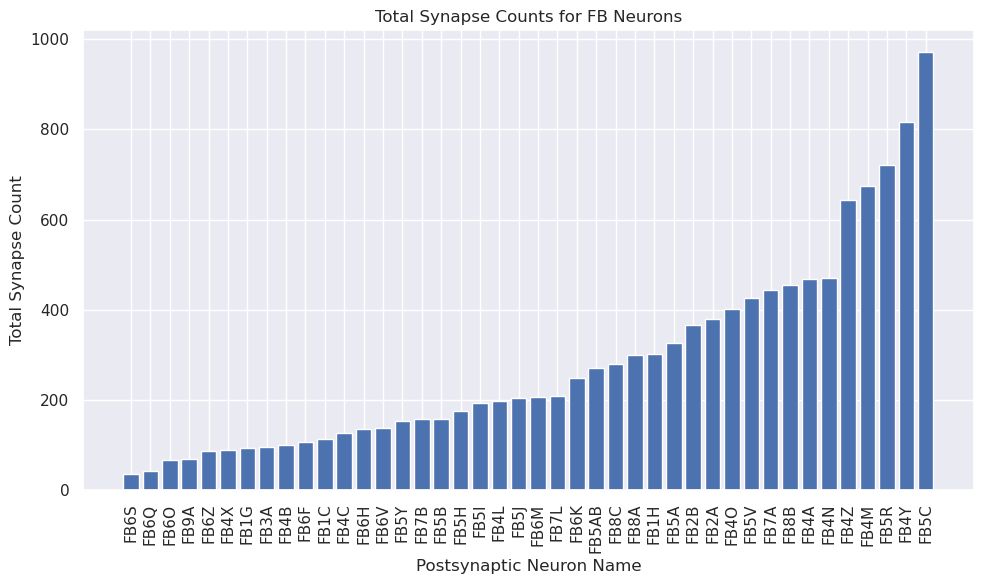

In [16]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Aggregate the total synapse counts for each postsynaptic neuron that starts with 'FB'
fb_synapse_counts = defaultdict(int)

for neuron_name, synapses in synapse_counts.items():
    for synapse_name, count in synapses.items():
        # Extract the postsynaptic neuron name after '--'
        match = re.search(r'--FB(.+)$', synapse_name)
        if match:
            postsynaptic_name = 'FB' + match.group(1)
            fb_synapse_counts[postsynaptic_name] += count

# Sort the dictionary by synapse counts
sorted_synapse_counts = dict(sorted(fb_synapse_counts.items(), key=lambda item: item[1]))

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_synapse_counts.keys(), sorted_synapse_counts.values())

plt.xlabel('Postsynaptic Neuron Name')
plt.ylabel('Total Synapse Count')
plt.title('Total Synapse Counts for FB Neurons')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the histogram
plt.show()


Significant neuron pairs with p-values < 0.05:
FB4Z -> hDeltaA with p-value 2.8364523752115437e-60
FB5R -> hDeltaH with p-value 6.135050603972756e-60
FB8B -> hDeltaD with p-value 7.86249188697021e-13
FB4A -> hDeltaB with p-value 5.658250852782267e-11
FB5R -> hDeltaG with p-value 4.4639622043262294e-08
FB4N -> FB1G with p-value 9.105941166487129e-06
FB8B -> hDeltaE with p-value 2.143704626061617e-05
FB8C -> hDeltaD with p-value 2.143704626061617e-05
FB4N -> hDeltaB with p-value 0.00022839625489965354
FB5C -> FB5AB with p-value 0.0003289868018005364
FB5Y -> FB5AB with p-value 0.0005599045911972455
FB8B -> DNpe053 with p-value 0.0007898612897149187
FB9A -> hDeltaD with p-value 0.001800480009034045
FB7B -> hDeltaE with p-value 0.0021099143148521683
FB4O -> hDeltaI with p-value 0.008018615109024756
FB5I -> hDeltaC with p-value 0.009206685783609508
FB5C -> hDeltaM with p-value 0.013767438265455255
FB5C -> hDeltaI with p-value 0.015680336335970716
FB4A -> hDeltaI with p-value 0.02021856198899

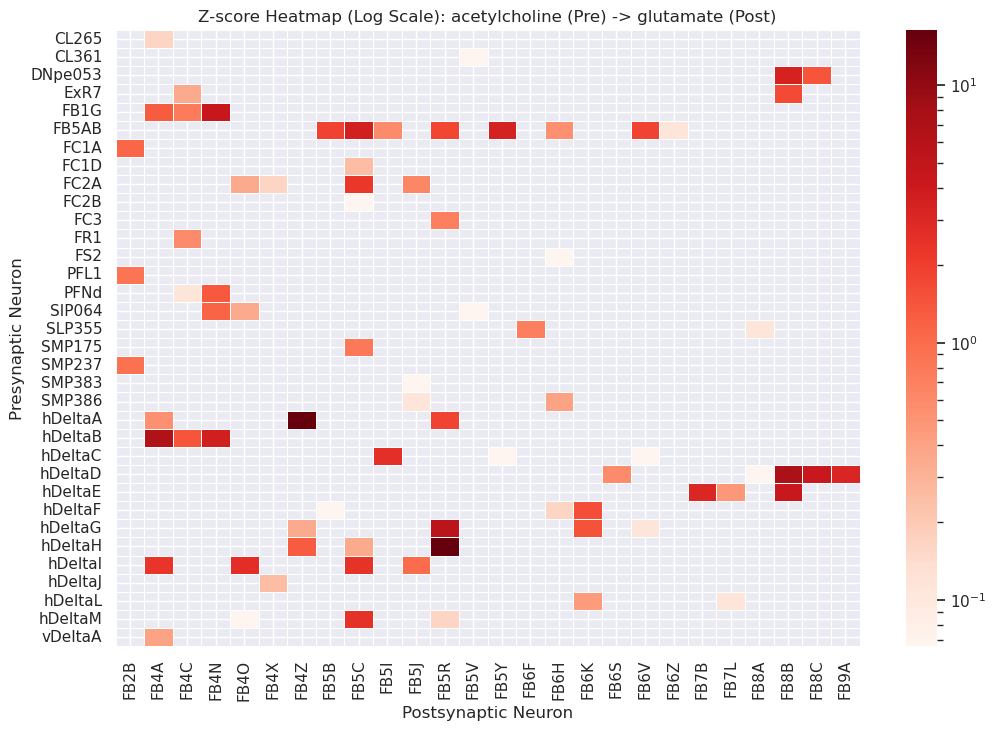

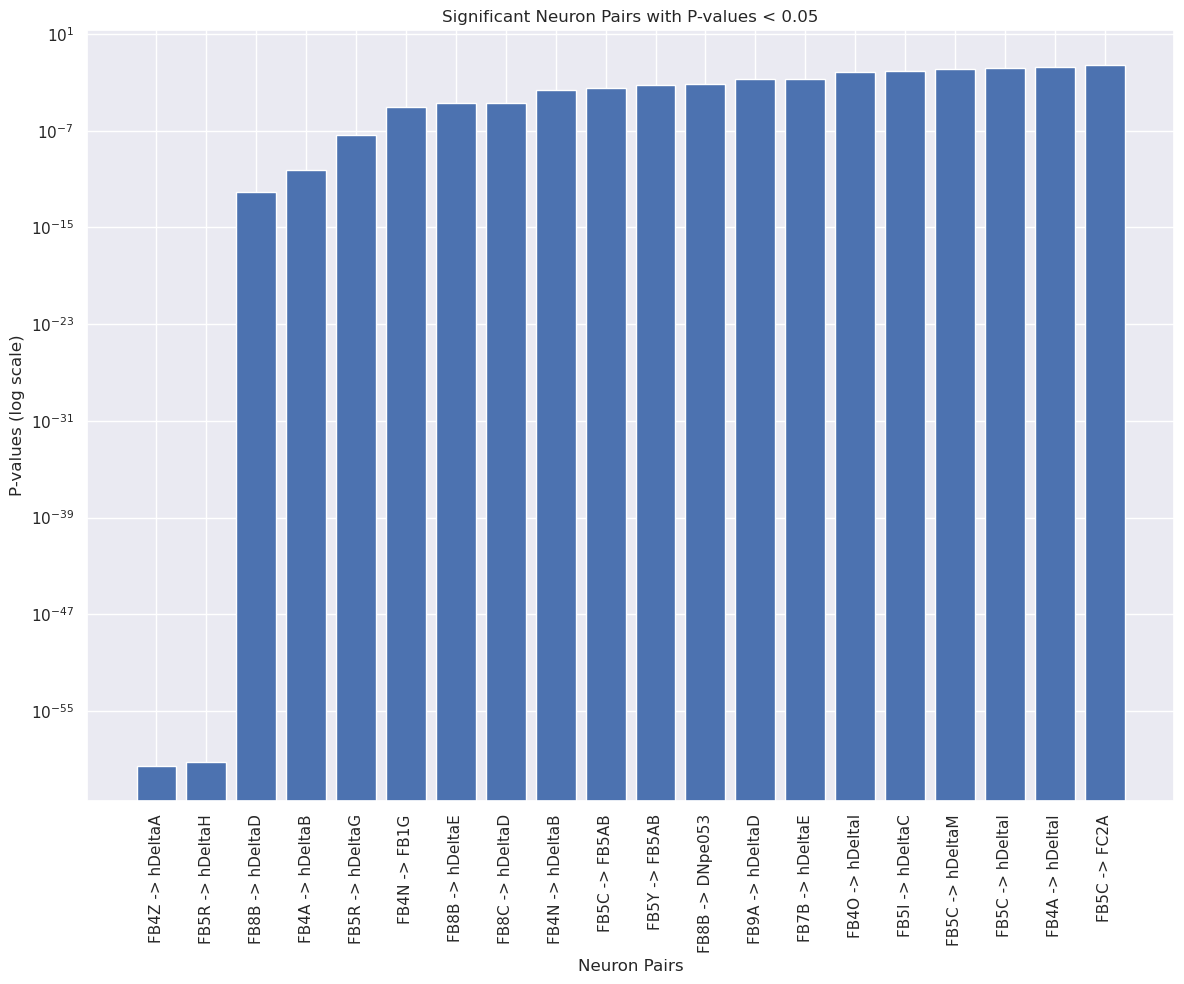

Significant neuron pairs with p-values < 0.05:
FB5C -> ExR5 with p-value 1.757114845679901e-38
FB4Z -> FB5V with p-value 1.468531397426441e-31
FB7A -> FB7B with p-value 1.603621458838004e-21
FB7A -> FB6S with p-value 3.4182705403753215e-12
FB4O -> FB4O with p-value 1.1671204039779588e-11
FB8C -> FB8A with p-value 3.8789466953076863e-10
FB7A -> FB6H with p-value 8.145459811256446e-10
FB2B -> ExR5 with p-value 1.6878485571996986e-09
FB5B -> FB5I with p-value 3.7998633752268854e-08
FB5C -> FB5B with p-value 8.82717641800588e-07
FB5C -> FB5R with p-value 6.5600724380617075e-06
FB8B -> FB7B with p-value 0.00017784479129838082
FB5V -> FB4Z with p-value 0.00028143441019035846
FB6K -> FB5Y with p-value 0.0005468706084859632
FB4O -> ExR5 with p-value 0.0008380080278863098
FB7L -> FB7B with p-value 0.0008380080278863098
FB8A -> FB7B with p-value 0.001267803597583103
FB5V -> ExR5 with p-value 0.008305526251304473
FB8A -> FB8C with p-value 0.009851101243049854
FB4Z -> FB4Z with p-value 0.013729776

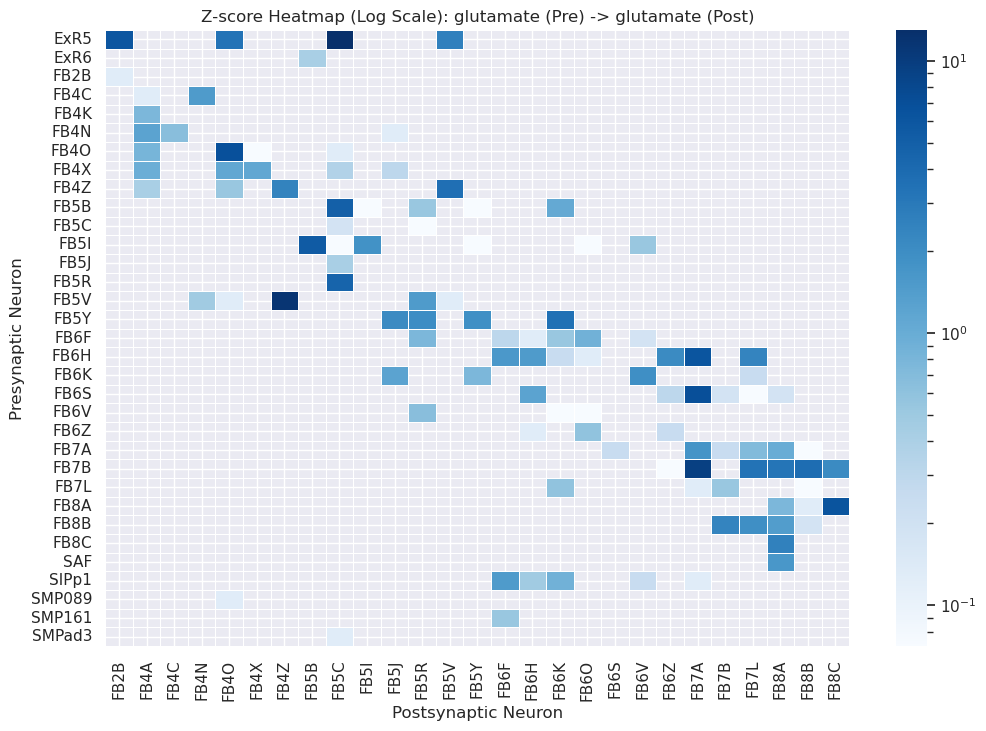

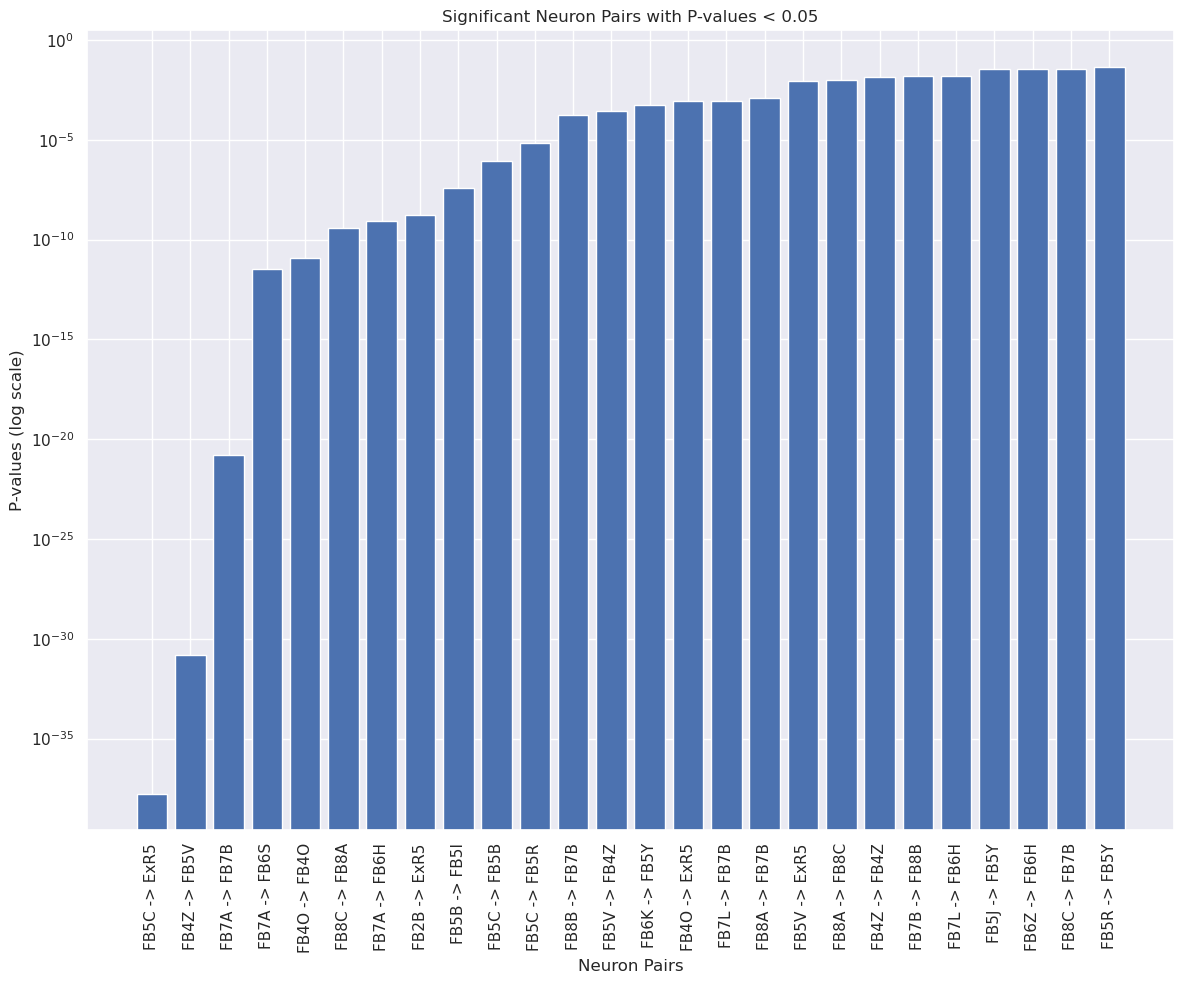

Significant neuron pairs with p-values < 0.05:
No data available for serotonin (Pre) -> serotonin (Post)
[twisted 2024-11-18 03:08:36,489] /tmp/ipykernel_613/1660492094.py:76: builtins.RuntimeWarning: Mean of empty slice.
[twisted 2024-11-18 03:08:36,492] /home/ffbo/miniconda/envs/ffbo/lib/python3.9/site-packages/numpy/core/_methods.py:129: builtins.RuntimeWarning: invalid value encountered in scalar divide
[twisted 2024-11-18 03:08:36,493] /home/ffbo/miniconda/envs/ffbo/lib/python3.9/site-packages/numpy/core/_methods.py:206: builtins.RuntimeWarning: Degrees of freedom <= 0 for slice
[twisted 2024-11-18 03:08:36,494] /home/ffbo/miniconda/envs/ffbo/lib/python3.9/site-packages/numpy/core/_methods.py:163: builtins.RuntimeWarning: invalid value encountered in divide
[twisted 2024-11-18 03:08:36,495] /home/ffbo/miniconda/envs/ffbo/lib/python3.9/site-packages/numpy/core/_methods.py:198: builtins.RuntimeWarning: invalid value encountered in scalar divide


In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from matplotlib.colors import LogNorm
from scipy.stats import norm

# Function to extract the neuron type prefix from neuron names
def get_neuron_type(neuron_name):
    return neuron_name.split('_')[0]

# Function to determine the most common neurotransmitter for each cell type
def get_most_common_neurotransmitter(neuroTransmitterDict):
    neuron_type_to_transmitters = defaultdict(list)
    
    for neuron, transmitters in neuroTransmitterDict.items():
        neuron_type = get_neuron_type(neuron)
        neuron_type_to_transmitters[neuron_type].extend(transmitters)
    
    neuron_type_to_common_transmitter = {}
    for neuron_type, transmitters in neuron_type_to_transmitters.items():
        most_common_transmitter = Counter(transmitters).most_common(1)[0][0]
        neuron_type_to_common_transmitter[neuron_type] = most_common_transmitter
    
    return neuron_type_to_common_transmitter

# Ensure your neuroTransmitterDict is defined before calling this
neuron_type_to_common_transmitter = get_most_common_neurotransmitter(neuroTransmitterDict)

debug_mode = False  # Set to False to disable debugging prints

# Function to create the heatmap for specific neurotransmitter pairs and calculate p-values
def create_heatmap_with_pvalues(presynaptic_neurotransmitter, postsynaptic_neurotransmitter, heatmap_color, show_all_data, p_value_threshold=0.05):
    # Create a dictionary to store counts for heatmap
    heatmap_data = defaultdict(lambda: defaultdict(int))
    
    # Populate the dictionary with counts from synapse_counts
    for presynaptic_neuron, synapses in synapse_counts.items():
        pre_neurotransmitter = neuron_type_to_common_transmitter.get(presynaptic_neuron, None)
        if debug_mode: print(f"Presynaptic Neuron: {presynaptic_neuron}, Neurotransmitter: {pre_neurotransmitter}")
        for synapse, count in synapses.items():
            postsynaptic_neuron = synapse.split('--')[1]
            post_neurotransmitter = neuron_type_to_common_transmitter.get(postsynaptic_neuron, None)
            if debug_mode: print(f"  Synapse: {synapse}, Postsynaptic Neuron: {postsynaptic_neuron}, Neurotransmitter: {post_neurotransmitter}, Count: {count}")
            if pre_neurotransmitter == presynaptic_neurotransmitter and post_neurotransmitter == postsynaptic_neurotransmitter:
                heatmap_data[presynaptic_neuron][postsynaptic_neuron] = count
                if debug_mode: print(f"    Added to heatmap: {presynaptic_neuron} -> {postsynaptic_neuron} with count {count}")

    if debug_mode:
        print("Final heatmap_data:")
        print(dict(heatmap_data))  # Convert defaultdict to dict for clearer printing

    if show_all_data:
        # Ensure all neurons from the synapse_counts are included even if they don't have matching neurotransmitters
        all_presynaptic_neurons = set(synapse_counts.keys())
        all_postsynaptic_neurons = set()
        for synapses in synapse_counts.values():
            for synapse in synapses:
                all_postsynaptic_neurons.add(synapse.split('--')[1])

        for presynaptic_neuron in all_presynaptic_neurons:
            if presynaptic_neuron not in heatmap_data:
                heatmap_data[presynaptic_neuron] = defaultdict(int)
            for postsynaptic_neuron in all_postsynaptic_neurons:
                if postsynaptic_neuron not in heatmap_data[presynaptic_neuron]:
                    heatmap_data[presynaptic_neuron][postsynaptic_neuron] = 0

    # Convert dictionary to a DataFrame for use with seaborn
    heatmap_df = pd.DataFrame(heatmap_data).fillna(0)
    if debug_mode:
        print("Heatmap DataFrame (before sorting):")
        print(heatmap_df)

    # Calculate z-scores
    mean_val = heatmap_df.values.mean()
    std_dev = heatmap_df.values.std()
    z_scores = (heatmap_df - mean_val) / std_dev

    if debug_mode:
        print("Z-score Heatmap DataFrame (before sorting):")
        print(z_scores)

    # Reconfirm sorting
    presynaptic_sorted = sorted(z_scores.index)
    postsynaptic_sorted = sorted(z_scores.columns)

    if debug_mode:
        print("Presynaptic neurons sorted: ", presynaptic_sorted)
        print("Postsynaptic neurons sorted: ", postsynaptic_sorted)

    # Re-index and re-order DataFrame
    z_scores = z_scores.reindex(index=presynaptic_sorted, columns=postsynaptic_sorted)

    if debug_mode:
        print("Sorted Z-score Heatmap DataFrame (after sorting):")
        print(z_scores)
    
    # Calculate p-values
    p_values = norm.sf(abs(z_scores)) * 2  # Two-tailed p-value

    if debug_mode:
        print("P-values Heatmap DataFrame:")
        print(p_values)

    # Filter significant pairs based on p-value threshold
    significant_pairs = p_values < p_value_threshold
    significant_coords = np.where(significant_pairs)
    significant_list = [(z_scores.index[x], z_scores.columns[y], p_values[x, y]) for x, y in zip(significant_coords[0], significant_coords[1])]

    # Sort significant pairs by p-value
    significant_list.sort(key=lambda x: x[2])

    print(f"Significant neuron pairs with p-values < {p_value_threshold}:")
    for pair in significant_list:
        print(f"{pair[0]} -> {pair[1]} with p-value {pair[2]}")

    if not z_scores.empty:
        # Plot the heatmap with a logarithmic color scale
        plt.figure(figsize=(12, 8))
        sns.heatmap(z_scores.T, annot=show_annotations, cmap=heatmap_color, linewidths=.5, norm=LogNorm())
        plt.title(f'Z-score Heatmap (Log Scale): {presynaptic_neurotransmitter} (Pre) -> {postsynaptic_neurotransmitter} (Post)')
        plt.xlabel('Postsynaptic Neuron')
        plt.ylabel('Presynaptic Neuron')
        plt.show()
    else:
        print(f"No data available for {presynaptic_neurotransmitter} (Pre) -> {postsynaptic_neurotransmitter} (Post)")

    # Plot significant pairs
    if significant_list:
        plot_significant_pairs(significant_list)

# Define a function to plot significant pairs
def plot_significant_pairs(significant_pairs):
    presynaptic_neurons = [f"{pair[0]} -> {pair[1]}" for pair in significant_pairs]
    p_values = [pair[2] for pair in significant_pairs]

    # Adjust the figure size
    fig_width = 12
    fig_height = min(10, len(presynaptic_neurons) * 0.5)

    # Create the plot
    plt.figure(figsize=(fig_width, fig_height))
    bars = plt.bar(presynaptic_neurons, p_values, log=True)

    plt.xlabel('Neuron Pairs')
    plt.ylabel('P-values (log scale)')
    plt.title('Significant Neuron Pairs with P-values < 0.05')
    plt.xticks(rotation=90, ha='center', va='top')
    plt.tight_layout()
    plt.show()

# Example usage
show_annotations = False  # Variable to control whether to show annotations
show_all_data = False  # Variable to control whether to show all data or only matching data
create_heatmap_with_pvalues('acetylcholine', 'glutamate', 'Reds', show_all_data, p_value_threshold=0.05)
create_heatmap_with_pvalues('glutamate', 'glutamate', 'Blues', show_all_data, p_value_threshold=0.05)


In [ ]:


neuropil = database.sql_query(""" select from Neuropil where name = "{}" """.format(neuropil_name)) 
neurons = neuropil.gen_traversal_in(['ArborizesIn', 'Neuron'], min_depth = 1) 
celltype_names = list(np.unique([neuron.name for neuron in neurons.node_objs]))

neuropil = database.sql_query(""" select from Neuropil where name = "{}" """\ .format(neuropil_name)) 
neurons = neuropil.gen_traversal_in(['ArborizesIn', 'Neuron'], min_depth = 1) 
neuron_names = [neuron.uname for neuron in neurons.node_objs]

query_result = database.sql_query(""" select from Neuron where uname = "{}" """\ .format(name)) 

if len(query_result.node_objs) == 0: 
	info = {"error": "No matching neuron in database."} 
else: 
	neuron = query_result.node_objs[0] 
	attributes = {} 
	attributes["name"] = neuron.uname 
	attributes["celltype"] = neuron.name 
	nt_query_result = query_result.gen_traversal_out(['HasData', 'NeurotransmitterData'], min_depth = 1)
	if len(nt_query_result.node_objs) > 0: 
nt = nt_query_result.node_objs[0].Transmitters attributes["neurotransmitters"] = nt

In [ ]:
noi = "FB4A"
noi2 = f"/r(.*){noi}(.*)_R(.*)/r"
prePost = 'pre'
nSys = 35
nFilter = '/r(.*)(.*)/r'
nplQuery = f"show {noi2} neurons"
print(nplQuery)
data = my_client.executeNLPquery(nplQuery)

In [ ]:
data = my_client.executeNLPquery(f"add {prePost}synaptic {nFilter} neurons with at least {nSys} synapses")

In [ ]:
# timer
start_time = time.time()

neurons = my_client.NLP_result.neurons

hashids = list(neurons.keys())
names = [neurons[k]['uname'] for k in neurons]

preSynapses = []
postSynapses = []

for i, hashid in enumerate(hashids):
    res = my_client.getInfo(hashid)
    data = res["data"]

    if "connectivity" in data:
        presyn = data["connectivity"]["pre"]["details"]
        postsyn = data["connectivity"]["post"]["details"]
        
        for syn in presyn:
            if 'segment' not in syn["uname"]:
                preSynapses.append(["pre", syn["syn_uname"], names[i], syn["uname"], syn["s_rid"], syn["number"], True])

        for syn in postsyn:
            if 'segment' not in syn["uname"]:
                postSynapses.append(["post", syn["syn_uname"], names[i], syn["uname"], syn["s_rid"], syn["number"], True])

connectivity = {"hashids": hashids, "names": names, "preSynapses": preSynapses, "postSynapses": postSynapses}

postSynNumberDict = {}
preSynNumberDict = {}

def process_synapses(synapses, synNumberDict, synType):
    for neuronName in connectivity['names']:
        singleNeuron_synNumber = []
        singleNeuron_synData = []
        for syn in synapses:
            if neuronName == syn[2]:
                singleNeuron_synNumber.append(syn[5])
                singleNeuron_synData.append([syn[3], syn[4], syn[5]])

        synZscore = stats.zscore(singleNeuron_synNumber)
        isnan = np.isnan(synZscore)

        if not np.any(isnan):
            synZmax = max(synZscore)
            print(f'\033[92m{neuronName}: {synType}SynZmax= {synZmax}\033[0m')
        else:
            for syn in synapses:
                if neuronName == syn[2]:
                    syn[6] = False
            print(f'\033[93m{neuronName} Error: Nan Value Found in array\033[0m')
            continue

        for r in range(len(singleNeuron_synData)):
            syn_uname = singleNeuron_synData[r][0]
            if 'segment' not in syn_uname:
                syn_rid = singleNeuron_synData[r][1]
                normSynZ = 1 - ((synZmax - synZscore[r]) / synZmax)
                synNumberDict[syn_rid] = [syn_uname, synZscore[r], normSynZ]

process_synapses(postSynapses, postSynNumberDict, "post")
process_synapses(preSynapses, preSynNumberDict, "pre")

numberOfNodes = len(names)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
avSynCalc_time = elapsed_time / (len(preSynapses) + len(postSynapses))
avNeuronCalc_time = elapsed_time / numberOfNodes

print ("No. of HashIDs= " + str( len(hashids)))
print ("No. of names= " + str( numberOfNodes ))
print ("No. of preSynapses= " + str( len(preSynapses)))
print ("No. of postSynapses= " + str( len(postSynapses)))
print(f"Elapsed time: {elapsed_time:.2f} seconds")
print(f"Avg. time per synapse: {avSynCalc_time:.4f} seconds")
print(f"Avg. time per neuron: {avNeuronCalc_time:.4f} seconds")

In [ ]:
#output to CSV if needed
with open('preOutput.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['type','syn_name','uname','s_rid','hashid','number'])
    writer.writerows(preSynapses)


In [ ]:
with open('postOutput.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['type','syn_name','uname','s_rid','hashid','number'])
    writer.writerows(postSynapses)

In [ ]:
res = my_client.getConnectivity()
nodes = dict(res.graph.nodes(data=True))
edges = list(res.graph.edges(data=True))

#sample outputs 
#print(edges)
#print(edges[0][0])
#display(JSON(nodes))
#print(edges)


In [ ]:
display(JSON(nodes))
display(JSON(edges))

In [ ]:
#G = NetworkX Directional Graph -DiGraph- Creation

G = nx.DiGraph()

for e_pre in nodes:
    try:
        G.add_node(e_pre, uname = nodes[e_pre]['uname'],)
    except KeyError as e:
        print(f"key {e.args[0]} not found")
        continue
    
for edge in edges:
    try:
        G.add_edge(edge[0],edge[1])
    except KeyError as e:
        print(f"key {e.args[0]} error occured")
        continue    

In [ ]:
#Calculate Centrality
#add centrality to DiGraph

#Orignally Degree centrality was used
#But has been changed so that key bridge nodes can be identified
#A key bridge may have a at least one weak pre or post synaptic connection
#But a cnetral bridge with weak connectivty on both ends must be avoided
#centralityDict = nx.degree_centrality(G)
centralityDict = nx.betweenness_centrality(G, k=numberOfNodes, normalized=True, weight=None, endpoints=False, seed=None)

for e_pre in nodes:
    G.add_node(e_pre, centrality = centralityDict[e_pre])

#print(G.nodes(data=True))
#display(JSON(dict(G.nodes(data=True))))
#G.nodes(data=True)["#1019:74700"]["centrality"]
#G.edges(data=True)
#print(G.edges(data=True))
#print(G.nodes(data=True))
#display(JSON(centralityDict))
#centralityDict["#1019:74508"]
#list(valid_nodes)
#G.nodes.items()


In [ ]:
#GraphViz
#Rndering the final output ot NeuGFX

#false = line , ortho is curved for example
gvSplines = "false"

graph_struct = {'verbose':'false',
                'splines': gvSplines,
                'pad': '0.5',
                'ranksep': '1.5',
                'concentrate': 'true',
                'newrank': 'true',
                'rankdir': 'LR'}


edgeFontSize = '8.0'
edgeFontColor = "#40e0d0"
edgeFontName = "Courier"
gvSize = '50,50'
#gvLayout = 'dot'
#gvLayout = 'sfdp'
gvLayout = 'sfdp'

g = Digraph('G', 
            filename ='G_ex.gv',
            graph_attr = {  'size': gvSize,
                            'layout':gvLayout,
                            'fontcolor':edgeFontColor,
                            'fontsize':edgeFontSize,
                            'fontname':edgeFontName,
                            'overlap_scaling':'2',
                            'rotation':'0',
                            'mode':'spring',
                            'beautify':'true',
                            'splines': 'curved',
                            'arrowsize': '0.5',
                            'overlap': 'false',
                            'pad': '0.1',
                            'quadtree':'true',
                            'nodesep': '0.3',
                            'outputorder': 'edgesfirst',
                            'ranksep': '0.2',
                            'bgcolor': '#212529',
                            'colorscheme':'rdylgn8',
                            'concentrate': 'true',
                            'newrank': 'true',
                            'rankdir': 'LR'})



In [ ]:
def calcColor(normalizedScore):

    pw = pw_default = 0.1
    pc = pc_defult = 'gray'
    retlist = []

    if normalizedScore < 0 :
        pw = pw_default
        pc=  pc_defult
    elif 0 <= normalizedScore < 0.1 :
        pw = pw_default
        pc = 'red'
    elif 0.1 <= normalizedScore < 0.2:
        pw = normalizedScore
        pc = 'orangered3'
    elif 0.2 <= normalizedScore < 0.3:
        pw =  normalizedScore
        pc = 'orangered2'
    elif 0.3 <= normalizedScore < 0.4:
        pw =  normalizedScore
        pc = 'gold' 
    elif 0.4 <= normalizedScore < 0.5:
        pw =  normalizedScore
        pc = 'chartreuse'
    elif 0.5 <= normalizedScore < 0.6:
        pw =  normalizedScore
        pc = 'limegreen' 
    elif 0.6 <= normalizedScore < 0.7:
        pw =  normalizedScore
        pc = 'lime'
    elif 0.7 <= normalizedScore < 0.8:
        pw =  normalizedScore
        pc = 'cyan3' 
    else:
        pw =  normalizedScore
        pc = 'blue' 

    retlist.extend([pw,pc])
    return retlist
 

In [ ]:
#EdgeLayout
#Using Centrality
#node_centrality Dict Created

valid_nodes = []
node_centrality = {}
nodeDegreeDict = {}
nodeNameZscoreDict = {}
zScoreMultiplyer = 5
widthColor = []

minNormZscore = 0.15
#display(JSON( G.edges(data=True)))
#print(G.edges(data=True))
for head, tail, data in G.edges(data=True):
    #print('pre= ' + str(head) + 'post= ' + str(tail))
    pre_name = G.nodes(data=True)[head]['uname']
    post_name = G.nodes(data=True)[tail]['uname']
    pw = pw_default = 0.1
    pc = 'grey'

    #set Edge Penwidth and color based on Normalized Z score
    
    #This checks if the head of the edge is presynaptic
    if head in preSynNumberDict.keys():
        widthColor = calcColor(preSynNumberDict[head][2])
        #print ('Head hashid '+ str(head) + '  name= ' + str(pre_name) + ' with val =' + str(preSynNumberDict[head][2])  )
        pw = widthColor[0] * zScoreMultiplyer
        pc = widthColor[1]
        includeEdge = True
        if preSynNumberDict[head][2] <= minNormZscore:
            includeEdge = False

        node_centrality[pre_name] = G.nodes(data=True)[head]['centrality']
        node_centrality[post_name] = G.nodes(data=True)[tail]['centrality']
        nodeNameZscoreDict[pre_name] = pw

    #This checks if the tail of the edge is postsynaptic
    elif tail in postSynNumberDict.keys():
        #print ('Tail hashid '+ str(tail) + 'name = ' + str(post_name) + 'with val= '+ str(postSynNumberDict[tail][2])  )
        widthColor = calcColor(postSynNumberDict[tail][2])
        #print ('Post hashid ' + str(post) + 'with val= '+ str(postSynNumberDict[post][2]) + ' width and color =' + str(widthColor) )
        pw = widthColor[0] * zScoreMultiplyer
        pc = widthColor[1]
        includeEdge = True
        if preSynNumberDict[tail][2] <= minNormZscore:
            
            includeEdge = False
            #print(preSynNumberDict[tail], 'excluded with normalized z score', preSynNumberDict[tail][2])
        
        node_centrality[pre_name] = G.nodes(data=True)[head]['centrality']
        node_centrality[post_name] = G.nodes(data=True)[tail]['centrality']
        nodeNameZscoreDict[pre_name] = pw
    
    
    else:
        print('Both ' + str(head) + 'and' + str(tail) + 'is not synapses!!!')
            

            
    #Don't include edges that are trivial
    if includeEdge:
        g.edge(str(pre_name), str(post_name), 
            labelfloat = 'true', 
            label = 'Zscore = ' + str(round(widthColor[0],2)),
            fontsize = edgeFontSize,
            fontcolor = edgeFontColor,
            fontname = edgeFontName,
            penwidth= str(pw),
            weight='3',
            arrowsize='0.4', 
            color=pc)
        valid_nodes.append(str(pre_name))
        valid_nodes.append(str(post_name))
        valid_nodes = list(set(valid_nodes))

        
        
        #    fontcolor = edgeFontColor,
  
    #nodeDegreeDict[post_name] = G.degree(post)
    

#display(JSON(dict(G.nodes(data=True))))
#print(valid_nodes)
#math.floor(node_centrality.get(str(pre_name))*1000)/1000
#maybe map the hashid to the uname

In [ ]:
#GraphViz node setup
#New version uses centrality



#NODE Attributtes

for _head in valid_nodes:
    #print(_head)
    #If  this is a pre or post synapse
    if '--' in str(_head):
        ht_float = math.floor(node_centrality.get(str(_head))*1000)/1000
        ht       = ht_float if ht_float > 0.05 else 0.05
        g.node(str(_head),
            shape='circle',
            height= str(ht),
            label='',
            fontsize='4.0',
            fixedsize='true',
            color= 'cyan' if ht_float > 0.05 else 'grey',
            style='filled')
    #else must a neuron node 
    else:
        if _head in nodeNameZscoreDict.keys():
            ht_float = math.floor(node_centrality.get(str(_head))*1000)/1000
            calculatedFontSize = str(ht_float * 10)
            centralityLabel = "cent= " + str(ht_float)
            #ht_float += (0.1 * nodeNameZscoreDict[_head])
            g.node(str(_head),
                shape='circle',
                height= str(ht_float),
                fontsize=calculatedFontSize,
                label= str(_head +"\n" + centralityLabel),
                fixedsize='true',
                fontcolor='white',
                color='brown2',
                style='filled')
        else:
            #because of NaN error, we remove this problematic node
            print(str(_head) + ' Not found in nodeNameZscoreDict')
            g.node(str(_head),
                shape='circle',
                height= '0.2',
                fontsize=calculatedFontSize,
                fixedsize='true',
                fontcolor='red',
                color='yellow',
                style='filled')
            
            
        
      


In [ ]:


g.attr(size='50,50')
g.verbose = True
try:
    g.save('G_auto.gv')
    g.render('G_auto', format = 'svg', view=False)
    
    
    #g.render('G_auto', format = 'png', view=False)
except Exception as e:
    self.raise_error(e, 'There was an error during diagram generation. Please execute "conda install -c anaconda graphviz" in your terminal in your conda environment, or try to install GraphViz globally from https://graphviz.org/download/.')


#Make a filter str to use in the save file name
nFilterStr = nFilter.replace('$','')

characters_to_replace = ['/r', ']', '[', '.', '*', '(', ')']

# Replace each character in the list
for char in characters_to_replace:
    nFilterStr = nFilterStr.replace(char, '')


noiFileName = str(noi +'_'+ nFilterStr + '_' + str(nSys) + prePost + '_001')
shutil.copy('G_auto.svg', noiFileName + '.svg')

In [ ]:
with open('G_auto.svg', 'r') as file:
    data = file.read()

In [ ]:
# Update widgets and widget managers throughout the frontend (included for compatibility)
for i in fbl.widget_manager.widgets:
    if fbl.widget_manager.widgets[i].widget_id not in fbl.client_manager.clients[fbl.widget_manager.widgets[i].client_id]['widgets']:
        fbl.client_manager.clients[fbl.widget_manager.widgets[i].client_id]['widgets'].append(fbl.widget_manager.widgets[i].widget_id)

# Load the diagram
my_client.tryComms({'widget':'GFX', 
                    'messageType': 'loadCircuitFromString', 
                    'data': {'string':data, 'name':'custom'}})

# Run the submodule called onGraphVizLoad2 to make the diagram interactive
my_client.tryComms({'widget':'GFX', 
                    'messageType': 'eval', 
                    'data': {'data':"window.fbl.loadSubmodule('data/FBLSubmodules/onGraphVizLoad2.js');", 'name':'custom'}})

# # open the file containing the graph in read mode
# with open('G_auto.gv', 'r') as file:
#     # read the file contents
#     data = file.read()
#         # move the cursor back to the start of the file
#     file.seek(0)
#     # read the file lines
#     lines = file.readlines()

In [ ]:

# specify the pattern to replace and the replacement text
#this should match any R or L suffix and remove all text within ()


#patterns = ['_[RL]_\d\d','\((.*?)\)']
#replacement_texts = ['', '']

patterns = ['_[RL]','_\d','_C\d']
replacement_texts = ['','','']

# open the file in read mode
with open('G_auto.gv', 'r') as file:
    # read the file lines
    lines = file.readlines()
    oglines = lines
    
# replace the patterns in each line
for i in range(len(patterns)):
    lines = [re.sub(patterns[i], replacement_texts[i], line) for line in lines]


# open the file in write mode
with open(noiFileName + '.gv', 'w') as postProcessfile:
    # write the new lines to the file
    postProcessfile.writelines(lines)
    

# open the file containing the graph in read mode
with open(noiFileName + '_all.gv', 'w') as postProcessfile:
    # write the new lines to the file
    postProcessfile.writelines(oglines)